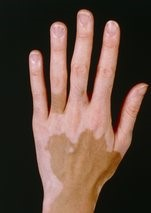

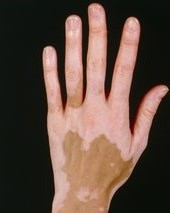

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def upload_and_display_image(name):
    image = cv2.imread(name)
    cv2_imshow(image)

upload_and_display_image("before_image.jpg")
upload_and_display_image("current_image.jpg")


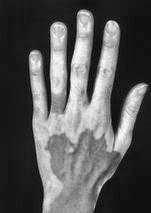

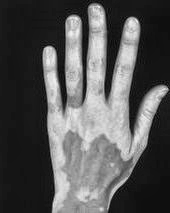

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def adjust_contrast(image):
    # Apply histogram equalization to adjust contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    adjusted_image = clahe.apply(image)
    return adjusted_image

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

before_image = cv2.imread("before_image.jpg")
current_image = cv2.imread("current_image.jpg")

before_gray = convert_to_grayscale(before_image)
current_gray = convert_to_grayscale(current_image)

before_adjusted = adjust_contrast(before_gray)
current_adjusted = adjust_contrast(current_gray)

cv2_imshow(before_adjusted)
cv2_imshow(current_adjusted)

In [ ]:
import cv2
import numpy as np

def find_darker_area(image):
    _, mask = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_area = 0
    for contour in contours:
        total_area += cv2.contourArea(contour)
    return total_area

before_gray = cv2.imread("/content/before_image.jpg", cv2.IMREAD_GRAYSCALE)
current_gray = cv2.imread("/content/current_image.jpg", cv2.IMREAD_GRAYSCALE)

before_area = find_darker_area(before_gray)
current_area= find_darker_area(current_gray)

print("Area of darker regions in before_gray image:", before_area)
print("Area of darker regions in current_gray image:", current_area)




Area of darker regions in before_gray image: 17969.0
Area of darker regions in current_gray image: 20505.5


In [ ]:
before_area = 17969.0
current_area = 20505.5

In [ ]:
import pandas as pd

DEFAULT_TIME_DURATION_WEEKS = 4
time_duration_weeks = DEFAULT_TIME_DURATION_WEEKS

progression = (current_area - before_area) / time_duration_weeks
progression_rate_per_week = (((current_area - before_area) / before_area) / time_duration_weeks) * 100
progression_rate = (((current_area - before_area) / before_area)) * 100

# Adjusted limits based on progression rate per week
regrowth_limit = 0 if progression_rate_per_week <= 50 else 5
stability_lower_limit = 5
stability_upper_limit = 10
initial_lower_limit = 15
initial_upper_limit = 20

if progression_rate_per_week <= regrowth_limit:
    stage = "Regrowth Stage"
elif regrowth_limit < progression_rate_per_week <= stability_upper_limit:
    stage = "Stability Stage"
elif stability_upper_limit < progression_rate_per_week <= initial_upper_limit:
    stage = "Initial Stage"
else:
    stage = "Progression Stage"

print("Progression  : ", progression)
print("Progression rate : ", progression_rate,"%")
print("Progression rate per week : ", progression_rate_per_week,"%")
print("\nStage :", stage)


Progression  :  634.125
Progression rate :  14.11597751683455 %
Progression rate per week :  3.5289943792086373 %

Stage : Stability Stage
